In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras

# Collect Dataset

In [100]:
# splitting in dependent and independent variables-
(features, actual_prices),_ = tf.keras.datasets.boston_housing.load_data(test_split=0)

In [101]:
print("Number of examples :", features.shape[0])
print("Number of features for each examples :", features.shape[1])
print("Shape of actual Prices :", actual_prices.shape[0])

Number of examples : 506
Number of features for each examples : 13
Shape of actual Prices : 506


In [16]:
# from keras.datasets import boston_housing
# (trainX, trainy), (testX, testy) = boston_housing.load_data(test_split = 0.2)

In [54]:
# print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

#### Scaling Data - 

In [102]:
from sklearn.preprocessing import StandardScaler
features_sc = StandardScaler().fit_transform(features)

In [103]:
from keras.layers import Dense
from keras.layers import Dropout

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
callback = EarlyStopping(
    monitor="loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [106]:
# Initialize the Sequential Model
model = tf.keras.models.Sequential()
model.add(Dense(100,activation = 'relu',input_dim=13,kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(100,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation = 'linear')) # activation for output layer - linear
model.compile(optimizer='adam', loss='mse',metrics =['mae']) # metrics = mae
history = model.fit(features_sc, actual_prices, epochs=500,callbacks=callback)



Epoch 1/500
16/16 [==============================] - 1s 5ms/step - loss: 582.8373 - mae: 22.0259
Epoch 2/500
16/16 [==============================] - 0s 4ms/step - loss: 394.3299 - mae: 17.4067
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 245.4703 - mae: 13.4126
Epoch 4/500
16/16 [==============================] - 0s 4ms/step - loss: 137.9929 - mae: 9.6231
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 69.7613 - mae: 6.4709
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 56.8272 - mae: 5.5498
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 39.6297 - mae: 4.7556
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 42.1856 - mae: 4.9071
Epoch 9/500
16/16 [==============================] - 0s 4ms/step - loss: 38.3526 - mae: 4.6784
Epoch 10/500
16/16 [==============================] - 0s 5ms/step - loss: 38.1518 - mae: 4.7355
Epoch 11/500
16/16 [======================

In [107]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               1400      
                                                                 
 dropout_28 (Dropout)        (None, 100)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               10100     
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_44 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,601
Trainable params: 11,601
Non-trainable params: 0
_________________________________________________________________


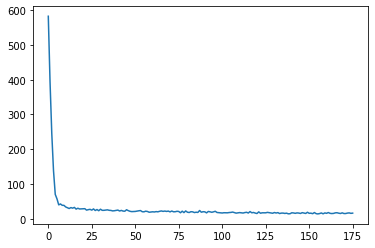

In [108]:
plt.plot(history.history['loss'])

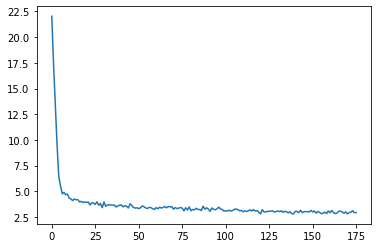

In [109]:
plt.plot(history.history['mae'])

### Solving another Regression problem - 

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [110]:
df = pd.read_csv('/content/Maison.csv')
df.head()

,PRIX,SUPERFICIE,CHAMBRES,SDB,ETAGES,ALLEE,SALLEJEU,CAVE,GAZ,AIR,GARAGES,SITUATION
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [111]:
# Since the columns are in french, in order to make them more readable, let's translate them into English
df = df.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [112]:
df.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


In [113]:
from sklearn.preprocessing import StandardScaler
df_sc = pd.DataFrame(StandardScaler().fit_transform(df),columns = df.columns)

In [114]:
df_sc.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,-0.979136,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,-1.110329,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,-0.698008,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,-0.285686,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,-0.266944,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372


In [115]:
# splitting dependent and independent variables - 
x = df_sc.iloc[:,1:]
y = df_sc.iloc[:,0]

In [116]:
x.head()


,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372


In [117]:
# split data in train test -
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [118]:
callback1 = EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [119]:
# Initialize the Sequential Model
model = tf.keras.models.Sequential()
model.add(Dense(100,activation = 'relu',input_dim=11,kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(100,activation = 'relu',kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation = 'linear')) # activation for output layer - linear
model.compile(optimizer='adam', loss='mse',metrics =['mae']) # metrics = mae
history = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=500,callbacks=callback1)


Epoch 1/500
14/14 [==============================] - 2s 18ms/step - loss: 2.7378 - mae: 1.2495 - val_loss: 0.5073 - val_mae: 0.5760
Epoch 2/500
14/14 [==============================] - 0s 6ms/step - loss: 1.7314 - mae: 1.0329 - val_loss: 0.3864 - val_mae: 0.5039
Epoch 3/500
14/14 [==============================] - 0s 7ms/step - loss: 1.6280 - mae: 0.9558 - val_loss: 0.3994 - val_mae: 0.5154
Epoch 4/500
14/14 [==============================] - 0s 7ms/step - loss: 1.3715 - mae: 0.8968 - val_loss: 0.3458 - val_mae: 0.4639
Epoch 5/500
14/14 [==============================] - 0s 7ms/step - loss: 1.0931 - mae: 0.7930 - val_loss: 0.3735 - val_mae: 0.4786
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 1.0849 - mae: 0.8008 - val_loss: 0.3172 - val_mae: 0.4493
Epoch 7/500
14/14 [==============================] - 0s 8ms/step - loss: 0.9473 - mae: 0.7347 - val_loss: 0.3661 - val_mae: 0.4749
Epoch 8/500
14/14 [==============================] - 0s 7ms/step - loss: 0.8763 - 

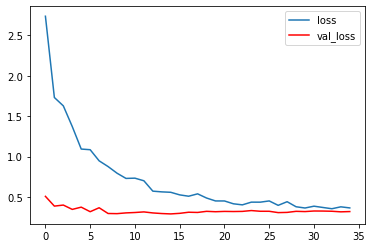

In [120]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],color = 'red',label= 'val_loss')
plt.legend()
plt.show()